In [1]:
import pandas as pd
import numpy as np 
import seaborn as sb
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Part 1: Showing the Dataset

In [2]:
df = pd.read_csv('zomato_res.csv')
df

,Additional_outlet_count,Call,Cost_for_two,Cuisines,Delivery_Time_min_order,Features,Home_Delivery,Operational_hours,Rating_votes,Restaurant_Location,Restaurant_Name,Restaurant_Type,View_Menu
0,1 more outlet in Mumbai,True,"₹1,500","Finger Food, Continental, European, Italian",NaN,"Food Hygiene Rated Restaurants In Mumbai, Best...",False,12noon – 1am (Mon-Sun),4.9 132...,Kamala Mills Compound,Lord of the Drinks,"Lounge,Casual Dining",True
1,1 more outlet in Mumbai,True,₹800,Pizza,NaN,"Value For Money, Best of Mumbai",False,11am – 12:30AM (Mon-Sun),4.6 597...,Malad West,Joey's Pizza,Quick Bites,True
2,NaN,True,"₹2,500",Seafood,NaN,"Super Seafood, Best of Mumbai",False,"Closed (Mon),12noon – 3pm, 7pm – 12midnight...",4.5 143...,"Linking Road, Bandra West",Bastian,"Casual Dining,Bar",True
3,NaN,True,"₹1,800","Finger Food, Continental",NaN,"Where's The Party?, Best of Mumbai, Food Hygie...",False,12noon – 1am (Mon-Sun),4.9 327...,Lower Parel,Tamasha,"Lounge,Bar",True
4,2 more outlets in Mumbai,True,₹450,"North Indian, Street Food, Fast Food, Chinese",45 min ...,NaN,True,"12noon – 4pm, 7pm – 11:45pm (Mon-Sun)",4.1 142...,Vashi,Bhagat Tarachand,Casual Dining,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7280,NaN,True,₹600,"South Indian, North Indian, Chinese, Fast Food...",45 min ...,NaN,True,8am – 12midnight (Mon-Sun),3.5 115...,Chembur,Hotel Shreedevi,Casual Dining,True
7281,NaN,True,₹550,"Fast Food, North Indian",20 min ...,NaN,True,"9am – 9pm (Mon, Wed, Thu, Fri, Sat, Sun), Clos...",3.5 121...,"Pali Hill, Bandra West",Mac Craig,Quick Bites,True
7282,NaN,True,₹350,"Fast Food, Beverages, Rolls",NaN,NaN,False,8am – 1:30am (Mon-Sun),3.5 213...,Juhu,Ice n Rolls,Quick Bites,True
7283,NaN,True,"₹2,000","Seafood, Chinese",40 min ...,NaN,True,12noon – 12:30AM (Mon-Sun),2.6 195...,"Hotel King's International, Juhu",Temple Flower - Hotel Kings International,Casual Dining,True


# Part 2: Introduction

__Column Legends:__
- __Additional_outlet_count__: The amount of additional outlet other than the main, if there is/are
- __Call__: the condition if the restaurant has a phone number to be contacted or not
- __Cost_for_two__: the average cost estimation for two people
- __Cuisines__: the type of Cuisines that is served by the restaurant
- __Delivery_Time_min_orders__: the duration of delivery time per order
- __Features__: the features that is/are provided by the restaurant
- __Home_Delivery__: the condition whether the restaurant could provide home delivery service or not
- __Operational_hours__: The operating hours and days of the restaurant
- __Rating_votes__: The average rating received by the restaurant
- __Restaurant_Name__: The name of the restaurant
- __Restaurant_Type__: The classification of the restaurant in the term of "way of eating"
- __View_Menu__: The condition if the restaurant provides the menu or not

In [12]:
##### Amount of Row and Column #####
print(f'rows = {df.shape[0]} | columns = {df.shape[1]}')

rows = 7285 | columns = 13


# Part 3: Data Analysis

__A. Top 20 Restaurant with Most Outlet__

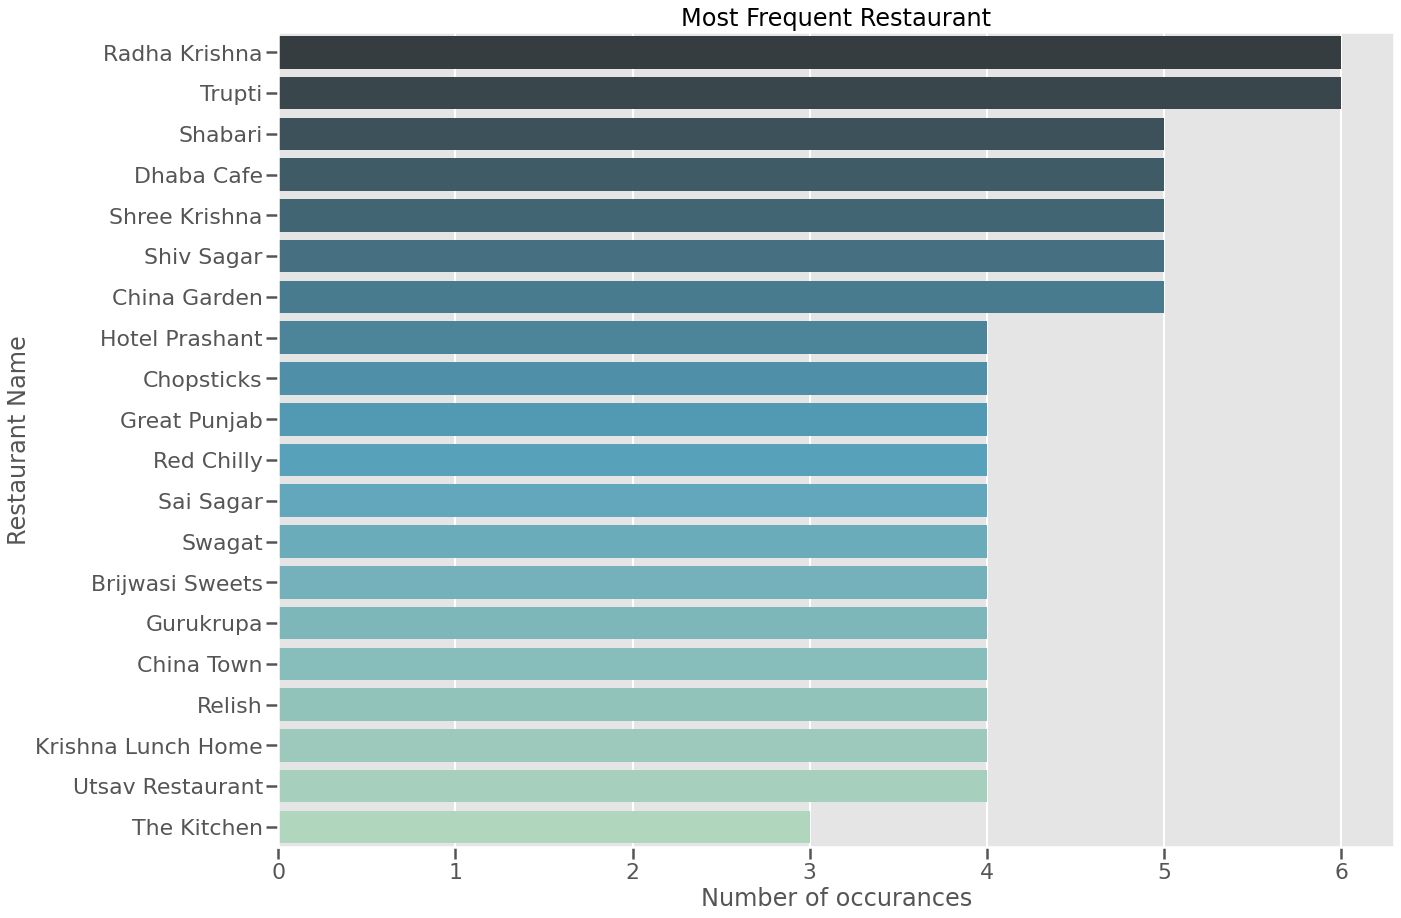

In [3]:
sb.set_context('poster')
plt.figure(figsize=(20,15))
books = df['Restaurant_Name'].value_counts()[:20]
sb.barplot(x = books, y = books.index, palette='GnBu_d')
plt.title("Most Frequent Restaurant")
plt.xlabel("Number of occurances")
plt.ylabel("Restaurant Name")
plt.show()

__B. Price (for Two People) Distribution__

In [9]:
#### Data Cleaning for 'price for two people' ####

#df = df.dropna(subset = ['Cost_for_two']) #--> dropping the incomplete data
#df['Cost_for_two'] = df['Cost_for_two'].str.replace('₹', '') #--> Removing Rupee Symbol
#df['Cost_for_two'] = df['Cost_for_two'].str.replace(',', '') #--> Removing koma
#df['Cost_for_two'] = df['Cost_for_two'].astype('int64') #--> changing data type from object into int64
df.dtypes

Additional_outlet_count    object
Call                         bool
Cost_for_two                int64
Cuisines                   object
Delivery_Time_min_order    object
Features                   object
Home_Delivery                bool
Operational_hours          object
Rating_votes               object
Restaurant_Location        object
Restaurant_Name            object
Restaurant_Type            object
View_Menu                    bool
dtype: object

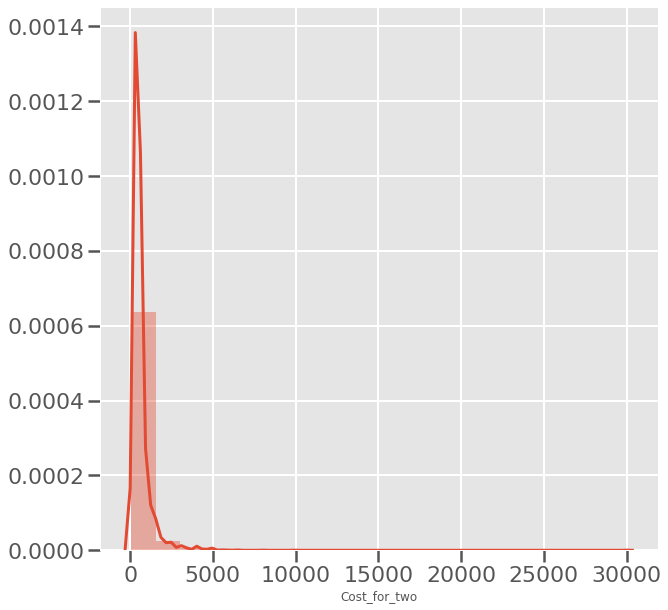

In [209]:
plt.figure(figsize=(10,10))
sb.distplot(df['Cost_for_two'], bins=20)
plt.show()

__C. Top 10 Restaurant with Highest Meal Cost__

In [192]:
Classy = df['Cost_for_two'] > 6000
Regular = df['Cost_for_two'] <= 6000
df[Classy].count()

Additional_outlet_count    0
Call                       5
Cost_for_two               5
Cuisines                   5
Delivery_Time_min_order    0
Features                   3
Home_Delivery              5
Operational_hours          5
Rating_votes               5
Restaurant_Location        5
Restaurant_Name            5
Restaurant_Type            5
View_Menu                  5
dtype: int64

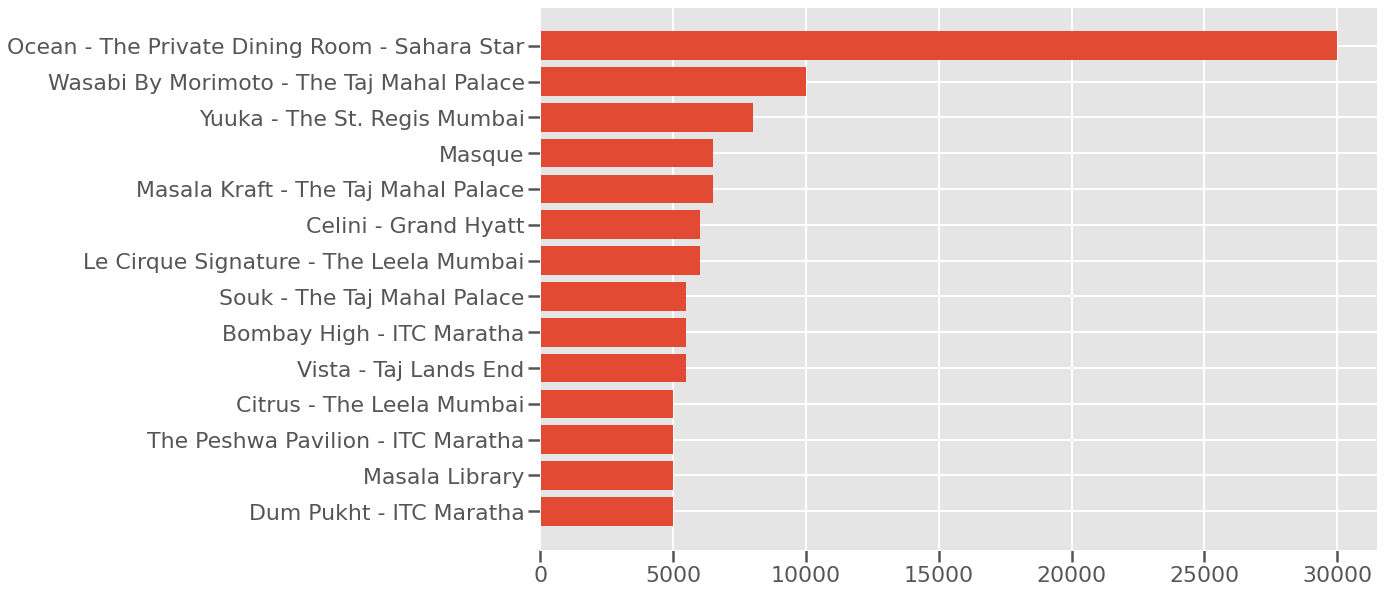

In [219]:
most_rated = df.sort_values('Cost_for_two', ascending = False).head(14).set_index('Restaurant_Name').sort_values(by=['Cost_for_two'], ascending=True)
plt.figure(figsize=(15,10))
plt.barh(most_rated.index, most_rated['Cost_for_two'], linewidth=10)
plt.show()